# 6.1 Sourcing Open Data

In [1]:
# Install data libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 1. Importing data sets

In [2]:
path = r'C:\Users\julia\anaconda3\Mental Health Service Ability vs Suicides'

In [6]:
df_mh = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Mental Health Service Ability.csv'), index_col = False)

In [7]:
df_s = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Suicide rates.csv'), index_col = False)

## 2. Check data frame

In [8]:
df_mh.shape

(1657, 7)

In [13]:
df_mh.dtypes

Id                        int64
Title Code               object
Title                    object
Country                  object
Year                      int64
Value                   float64
Data Collection Date     object
dtype: object

In [15]:
df_mh.describe()

,Id,Year,Value
count,1.657000e+03,1657.000000,1657.000000
mean,1.901804e+07,2015.614363,291.032976
std,3.692637e+06,0.948740,2258.151503
min,1.110146e+07,2013.000000,0.000000
25%,2.073904e+07,2015.000000,0.145000
50%,2.073946e+07,2016.000000,1.298000
75%,2.073987e+07,2016.000000,11.462000
max,2.074028e+07,2017.000000,44208.151000


In [19]:
df_mh.head()

,Id,Title Code,Title,Country,Year,Value,Data Collection Date
0,20738925,MH_6,Psychiatrists working in mental health sector ...,AFG,2016,0.231,2019-04-25T15:31:58Z
1,20738933,MH_6,Psychiatrists working in mental health sector ...,ALB,2016,1.471,2019-04-25T15:31:58Z
2,20738949,MH_6,Psychiatrists working in mental health sector ...,AGO,2016,0.057,2019-04-25T15:31:59Z
3,20738958,MH_6,Psychiatrists working in mental health sector ...,ATG,2016,1.001,2019-04-25T15:31:59Z
4,20738963,MH_6,Psychiatrists working in mental health sector ...,ARG,2016,21.705,2019-04-25T15:31:59Z


In [9]:
df_s.shape

(10980, 8)

In [14]:
df_s.dtypes

Title Code Suicide       object
Suicide rates            object
Country                  object
Location                 object
Year                      int64
Gender                   object
Value                   float64
Data Collection Date     object
dtype: object

In [16]:
df_s.describe()

,Year,Value
count,10980.000000,10980.000000
mean,2009.500000,11.960951
std,5.766544,12.812487
min,2000.000000,0.000000
25%,2004.750000,4.630000
50%,2009.500000,8.270000
75%,2014.250000,14.940000
max,2019.000000,195.200000


In [22]:
df_s.head()

,Title Code Suicide,Suicide rates,Country,Location,Year,Gender,Value,Data Collection Date
0,MH_12,Age-standardized suicide rates (per 100 000 po...,ATG,Antigua and Barbuda,2019,Male,0.00,2021-02-08T23:00:00.000Z
1,MH_12,Age-standardized suicide rates (per 100 000 po...,BRB,Barbados,2019,Female,0.16,2021-02-08T23:00:00.000Z
2,MH_12,Age-standardized suicide rates (per 100 000 po...,BRB,Barbados,2019,Both sexes,0.31,2021-02-08T23:00:00.000Z
3,MH_12,Age-standardized suicide rates (per 100 000 po...,ATG,Antigua and Barbuda,2019,Both sexes,0.32,2021-02-08T23:00:00.000Z
4,MH_12,Age-standardized suicide rates (per 100 000 po...,BRB,Barbados,2019,Male,0.49,2021-02-08T23:00:00.000Z


## 3. Visualizations

<Axes: xlabel='Year'>

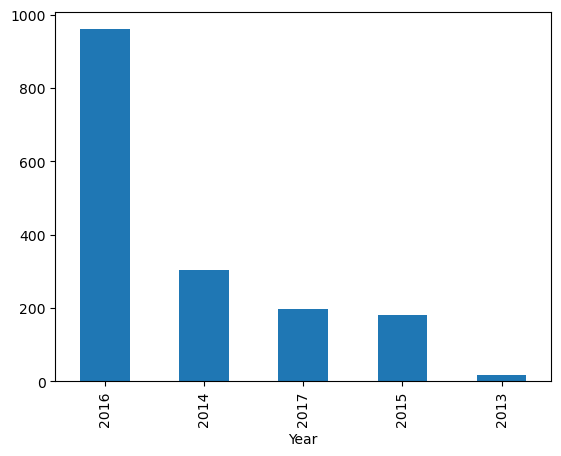

In [21]:
df_mh['Year'].value_counts().plot.bar()

<Axes: xlabel='Year'>

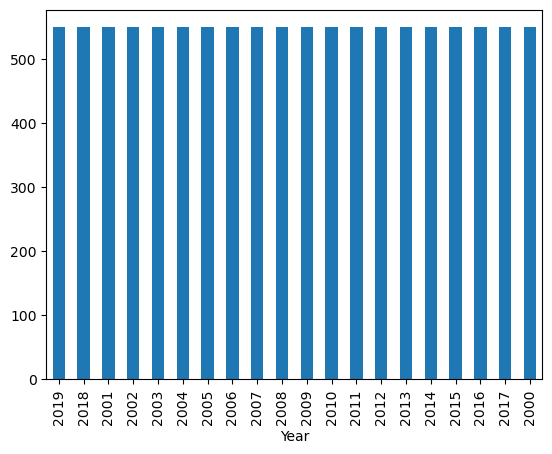

In [25]:
df_s['Year'].value_counts().plot.bar()

<Axes: ylabel='Frequency'>

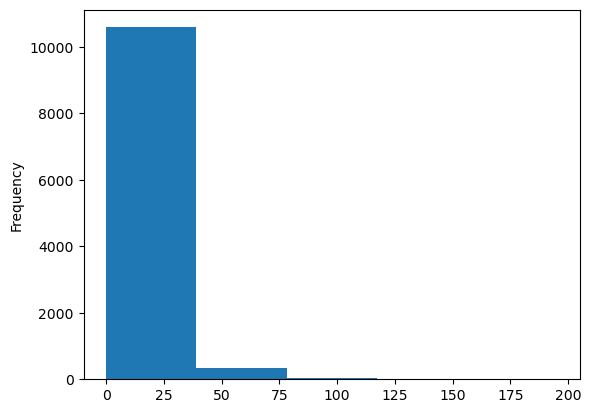

In [28]:
df_s['Value'].plot.hist(bins = 5)

## 4. Merging data

In [31]:
df_merge = df_mh.merge(df_s, on = 'Country', indicator = True)

In [34]:
df_merge.head(1)

,Id,Title Code,Title,Country,Year_x,Value_x,Data Collection Date_x,Title Code Suicide,Suicide rates,Location,Year_y,Gender,Value_y,Data Collection Date_y,_merge
0,20738925,MH_6,Psychiatrists working in mental health sector ...,AFG,2016,0.231,2019-04-25T15:31:58Z,MH_12,Age-standardized suicide rates (per 100 000 po...,Afghanistan,2019,Female,5.67,2021-02-08T23:00:00.000Z,both


## 5. Exporting data frame

In [39]:
df_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'mh_s_combined.pkl'))